<a href="https://colab.research.google.com/github/AtefehT1403/practice/blob/main/multi%20Perspetrom%20Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8215 - loss: 0.6339 - val_accuracy: 0.9618 - val_loss: 0.1448
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9518 - loss: 0.1591 - val_accuracy: 0.9693 - val_loss: 0.1080
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9696 - loss: 0.1042 - val_accuracy: 0.9723 - val_loss: 0.0949
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9766 - loss: 0.0796 - val_accuracy: 0.9748 - val_loss: 0.0884
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9823 - loss: 0.0580 - val_accuracy: 0.9747 - val_loss: 0.0901
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9853 - loss: 0.0481 - val_accuracy: 0.9762 - val_loss: 0.0809
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9893 - loss: 0.0370 - val_accuracy: 0.9757 - val_loss: 0.0825
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9916 - loss: 0.0287 - val_accuracy: 0

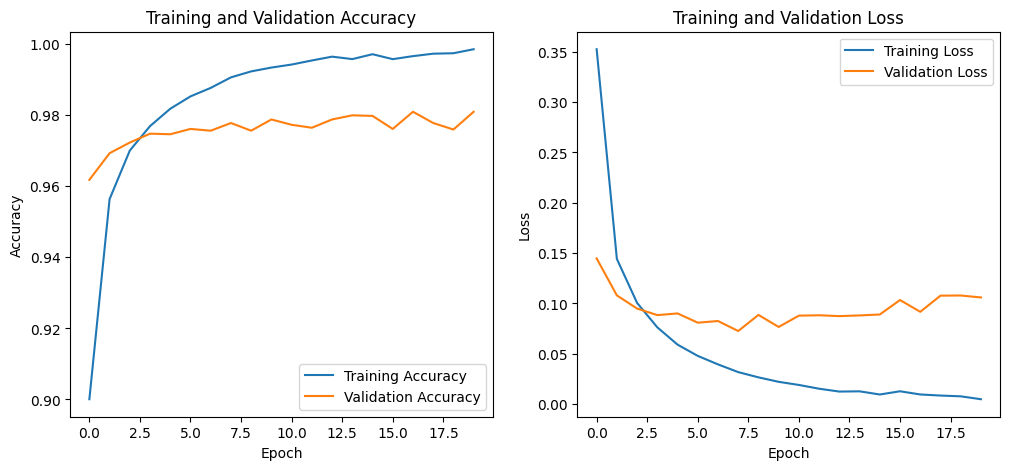

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. بارگذاری داده‌ها
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. پیش‌پردازش داده‌ها
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# تبدیل برچسب‌ها به قالب one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. تعریف مدل MLP
model = Sequential([
    Flatten(input_shape=(28, 28)),          # تبدیل تصویر 28x28 به بردار 784 بعدی
    Dense(128, activation='relu'),          # لایه مخفی اول با 128 نورون و تابع فعال‌سازی ReLU
    Dense(64, activation='relu'),           # لایه مخفی دوم با 64 نورون و تابع فعال‌سازی ReLU
    Dense(10, activation='softmax')         # لایه خروجی با 10 نورون و تابع softmax
])

# 4. کامپایل مدل
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. آموزش مدل و ذخیره تاریخچه آموزش
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1)

# 6. ارزیابی مدل روی داده تست
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

# 7. رسم نمودار دقت و خطا در طول آموزش
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
